In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator

In [2]:
os.getcwd()

'C:\\Users\\k2h2j3'

In [3]:
cd/Users/k2h2j3/traffic/Train

C:\Users\k2h2j3\traffic\Train


In [4]:
os.getcwd()

'C:\\Users\\k2h2j3\\traffic\\Train'

In [5]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in os.listdir(cur_path):
    dir = cur_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir+'/'+j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img, (32,32), interpolation = cv2.INTER_NEAREST)
        data.append(img)
        labels.append(i)
        
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 32, 32, 3) (39209,)


In [6]:
imageDimesions = (32,32,3)
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1)
X_train, X_validation, y_train, y_validation = train_test_split(X_train,y_train,test_size=0.2)
print("Data Shapes")
print("Train",end = "");print(X_train.shape,y_train.shape)
print("Validation",end = "");print(X_validation.shape,y_validation.shape)
print("Test",end = "");print(X_test.shape,y_test.shape)
assert(X_train.shape[0]==y_train.shape[0]), "The number of images in not equal to the number of lables in training set"
assert(X_validation.shape[0]==y_validation.shape[0]), "The number of images in not equal to the number of lables in validation set"
assert(X_test.shape[0]==y_test.shape[0]), "The number of images in not equal to the number of lables in test set"
assert(X_train.shape[1:]==(imageDimesions))," The dimesions of the Training images are wrong "
assert(X_validation.shape[1:]==(imageDimesions))," The dimesionas of the Validation images are wrong "
assert(X_test.shape[1:]==(imageDimesions))," The dimesionas of the Test images are wrong"

(39209, 32, 32, 3) (39209,)
Data Shapes
Train(28230, 32, 32, 3) (28230,)
Validation(7058, 32, 32, 3) (7058,)
Test(3921, 32, 32, 3) (3921,)


In [7]:
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)     # CONVERT TO GRAYSCALE
    img = equalize(img)      # STANDARDIZE THE LIGHTING IN AN IMAGE
    img = img/255            # TO NORMALIZE VALUES BETWEEN 0 AND 1 INSTEAD OF 0 TO 255
    return img

X_train = np.array(list(map(preprocessing,X_train)))
X_validation = np.array(list(map(preprocessing,X_validation)))
X_test = np.array(list(map(preprocessing,X_test)))
cv2.imshow("GrayScale Images", X_train[random.randint(0,len(X_train)-1)])

In [8]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

In [9]:
dataGen = ImageDataGenerator(width_shift_range = 0.1,
                            height_shift_range =0.1,
                            zoom_range = 0.2,
                            shear_range = 0.1,
                            rotation_range = 10)
dataGen.fit(X_train)
batches = dataGen.flow(X_train, y_train, batch_size=20)
X_batch,y_batch = next(batches)

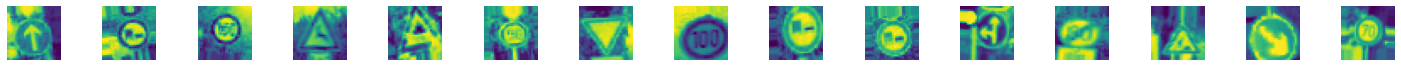

In [10]:
fig, axs=plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(imageDimesions[0],imageDimesions[1]))
    axs[i].axis('off')
plt.show()

In [11]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_validation = to_categorical(y_validation, 43)

In [12]:
labelFile = "C:/Users/k2h2j3/traffic/labels.csv"
data=pd.read_csv(labelFile)
print("data shape ",data.shape,type(data))

data shape  (43, 2) <class 'pandas.core.frame.DataFrame'>


Text(0, 0.5, 'Number of images')

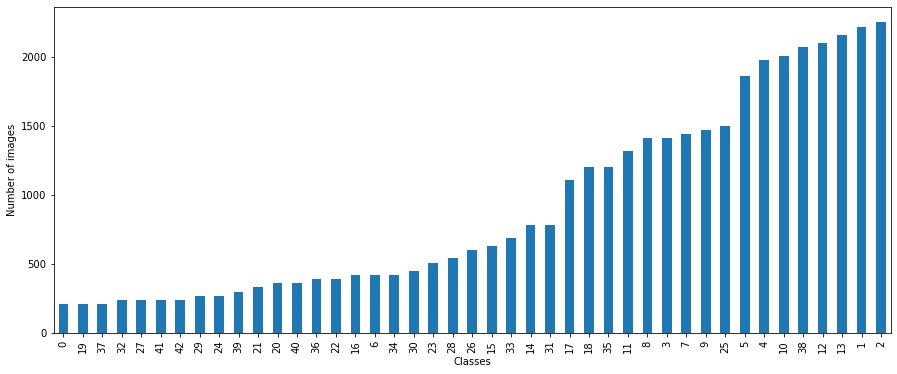

In [13]:
# number of images in each class
data_dic = {}
for folder in os.listdir(cur_path):
    data_dic[folder] = len(os.listdir(cur_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Classes')
plt.ylabel('Number of images')

In [26]:
#Building the model
model = Sequential()

# First Layer
model.add(Conv2D(filters=60, kernel_size=(5,5), activation='relu', input_shape=(imageDimesions[0],imageDimesions[1],1)))
model.add(Conv2D(filters=60, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Layer 
model.add(Conv2D(filters=60//2, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=60//2, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.5))


# Dense Layer
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.compile(Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 28, 28, 60)        1560      
                                                                 
 conv2d_31 (Conv2D)          (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 12, 12, 60)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 10, 10, 30)        16230     
                                                                 
 conv2d_33 (Conv2D)          (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 4, 4, 30)         0         
 g2D)                                                 

In [27]:
history=model.fit_generator(dataGen.flow(X_train,y_train,batch_size=50),
                            steps_per_epoch=502,epochs=10,
                            validation_data=(X_validation,y_validation),shuffle=1)
model.save("my_model3.h5")

Epoch 1/10


C:\Users\k2h2j3\AppData\Local\Temp/ipykernel_7024/701395491.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(dataGen.flow(X_train,y_train,batch_size=50),


502/502 [==============================] - 68s 135ms/step - loss: 2.5347 - accuracy: 0.2971 - val_loss: 0.8750 - val_accuracy: 0.7596
Epoch 2/10
502/502 [==============================] - 73s 145ms/step - loss: 1.2098 - accuracy: 0.6213 - val_loss: 0.3460 - val_accuracy: 0.9022
Epoch 3/10
502/502 [==============================] - 75s 149ms/step - loss: 0.8162 - accuracy: 0.7427 - val_loss: 0.1618 - val_accuracy: 0.9532
Epoch 4/10
502/502 [==============================] - 72s 144ms/step - loss: 0.6400 - accuracy: 0.7996 - val_loss: 0.1471 - val_accuracy: 0.9564
Epoch 5/10
502/502 [==============================] - 72s 144ms/step - loss: 0.5352 - accuracy: 0.8331 - val_loss: 0.1443 - val_accuracy: 0.9566
Epoch 6/10
502/502 [==============================] - 72s 144ms/step - loss: 0.4569 - accuracy: 0.8554 - val_loss: 0.0993 - val_accuracy: 0.9661
Epoch 7/10
502/502 [==============================] - 73s 146ms/step - loss: 0.4099 - accuracy: 0.8717 - val_loss: 0.0919 - val_accuracy: 0.9

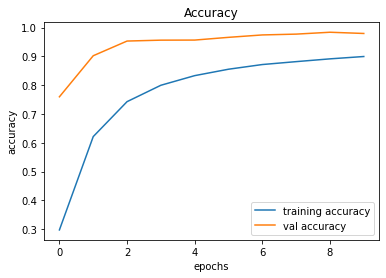

In [28]:
#plotting graphs for accuracy 
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

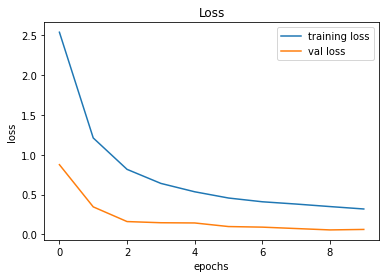

In [29]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [26]:
from IPython.display import Image
from matplotlib.image import imread

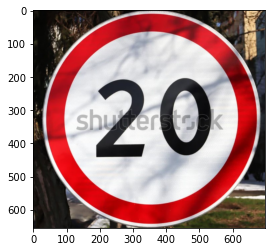

In [31]:
img = imread("C:/aiproject/20secd.jpg")
plt.imshow(img)

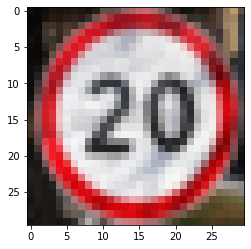

In [32]:
from skimage.transform import resize
resizeimg = resize(img,(30,30,3))
plt.imshow(resizeimg)

In [35]:
predictions = model.predict(np.array([resizeimg]))

predictions

array([[0.00065614, 0.05724911, 0.03052308, 0.31270579, 0.24075635,
        0.34782514, 0.00095206, 0.00124323, 0.00574541, 0.00101682,
        0.00132678]], dtype=float32)

In [36]:
result = np.argmax(predictions[0])
if result == 0:
    print("20")
elif result == 1:
    print("30")
elif result == 2:
    print("50")
elif result == 3:
    print("60")
elif result == 4:
    print("70")
elif result == 5:
    print("80")
elif result == 6:
    print("100")
elif result == 7:
    print("stop")
elif result == 9:
    print("right")
elif result == 10:
    print("left")
else:
    print("straight")

80
